In [1]:
from selenium import webdriver
import time
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import contractions
import string

In [2]:
df = pd.read_csv('Amazon Reviews Dirty-Copy1.csv', encoding = 'utf-8', names=["Title", "Review", "Rate"])
df

,Title,Review,Rate
0,Fill scooper 80% to get accurate serving size!,I read a few reviews before ordering this prod...,b'pos'
1,35 Day Review,I am a 57 year old woman who has been comforta...,b'pos'
2,I gotta be honest...,So I bought this with the complete intentions ...,b'pos'
3,I really dislike these powder supplements and ...,I received an email from Sports Research askin...,b'pos'
4,IBS is no longer an issue for me,After 15 plus years of battling IBS I felt i w...,b'pos'
5,This product cured my constant hunger and crav...,I try new products monthly. My cupboards are f...,b'pos'
6,THIS is the stuff to get,"I bought this for my joints, with the hope it ...",b'pos'
7,Eat this.,I gave it a full month before leaving a review...,b'pos'
8,REDUCED CELLULITE!!!,It was a girlfriend that let me in on her litt...,b'pos'
9,The Holy Grail,I started using this product every day 45 days...,b'pos'


In [3]:
#delete ratings with 3 (3 is blank in this dataframe)

df.drop('Title',axis=1,inplace=True)

df['Rate'] = df['Rate'].map(lambda x:
                             x.lstrip("b'").rstrip("'"))

df=df[df.Rate != ' ']

df

,Review,Rate
0,I read a few reviews before ordering this prod...,pos
1,I am a 57 year old woman who has been comforta...,pos
2,So I bought this with the complete intentions ...,pos
3,I received an email from Sports Research askin...,pos
4,After 15 plus years of battling IBS I felt i w...,pos
5,I try new products monthly. My cupboards are f...,pos
6,"I bought this for my joints, with the hope it ...",pos
7,I gave it a full month before leaving a review...,pos
8,It was a girlfriend that let me in on her litt...,pos
9,I started using this product every day 45 days...,pos


In [4]:
adf=df.dropna()
adf

,Review,Rate
0,I read a few reviews before ordering this prod...,pos
1,I am a 57 year old woman who has been comforta...,pos
2,So I bought this with the complete intentions ...,pos
3,I received an email from Sports Research askin...,pos
4,After 15 plus years of battling IBS I felt i w...,pos
5,I try new products monthly. My cupboards are f...,pos
6,"I bought this for my joints, with the hope it ...",pos
7,I gave it a full month before leaving a review...,pos
8,It was a girlfriend that let me in on her litt...,pos
9,I started using this product every day 45 days...,pos


In [5]:
Review = []
Rating = []
Symptoms= []
for row in adf["Review"]:
    #tokenize words
    words = word_tokenize(row)
    #remove punctuations
    clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
    #remove stop words
    english_stops = set(stopwords.words('english'))
    characters_to_remove = ['...', '', '’', "n't", "'s'",
                            '”', "", ' ', '  ','..','.',str("'s"),".i",
                            '“']
    clean_words = [word for word in clean_words if word not in english_stops]
    clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
    #Lematise words
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
    Review.append(lemma_list)

    for row in adf["Rate"]:
        Rating.append(row)

In [6]:
#with open('Amazon Reviews Clean 1.csv', 'w', newline='', encoding='utf-8') as csvfile:
    #wf = csv.writer(csvfile, delimiter=',',
                            #quotechar='"')
    
    #for save in range(0,4784):
        #wf.writerow([Review[save], Rating[save].encode("utf-8")])

# NAIVE BAYES

In [7]:
combined = zip(Review, Rating)

In [8]:
def bag_of_words(words):
    return dict([(word, True) for word in words])

In [9]:
Final_Data = []
for r, v in combined:
    bag_of_words(r)
    Final_Data.append((bag_of_words(r),v))

In [10]:
import random
random.shuffle(Final_Data)
print(len(Final_Data))

4774


In [11]:
train_set, test_set = Final_Data[0:3350], Final_Data[3350:]

In [12]:
import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics

refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set) #This is our Naive Bayes classifier
 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

print("Naive Bayes Performance with Unigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))
print("UnigramNB Results")
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Negative Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Negative Recall:', recall(testsets['neg'], refsets['neg']))
print('Brand Negative F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

Naive Bayes Performance with Unigrams 
Accuracy: 0.7970505617977528
UnigramNB Results
Brand Positive Precision: 0.9850327408793265
Brand Positive Recall: 0.7941176470588235
Brand Positive F-measure: 0.8793319415448851
Brand Negative Precision: 0.23098591549295774
Brand Negative Recall: 0.23098591549295774
Brand Negative F-measure: 0.3620309050772627



In [13]:
classifier.show_most_informative_features(n=50)

Most Informative Features
                diarrhea = True              neg : pos    =     55.2 : 1.0
                   waste = True              neg : pos    =     53.5 : 1.0
                  opened = True              neg : pos    =     43.9 : 1.0
                    rash = True              neg : pos    =     41.9 : 1.0
                   batch = True              neg : pos    =     40.2 : 1.0
                 allergy = True              neg : pos    =     38.2 : 1.0
                   choke = True              neg : pos    =     38.2 : 1.0
                   aware = True              neg : pos    =     33.1 : 1.0
                   throw = True              neg : pos    =     30.9 : 1.0
                  yellow = True              neg : pos    =     29.7 : 1.0
                     led = True              neg : pos    =     29.7 : 1.0
               wondering = True              neg : pos    =     29.7 : 1.0
                consumer = True              neg : pos    =     29.7 : 1.0

In [14]:
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set,  #making the necessary cutoffs to prune the tree
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats) #Start the model with the classifier
    testset[observed].add(i)

print("UnigramDT Results")
print("Accuracy:",nltk.classify.accuracy(dt_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

UnigramDT Results
Accuracy: 0.9332865168539326
Brand Positive Precision: 0.9850327408793265
Brand Positive Recall: 0.7941176470588235
Brand Positive F-measure: 0.8793319415448851
Brand Damaging Precision: 0.23098591549295774
Brand Damaging Recall: 0.6
Brand Damaging F-measure: 0.3620309050772627



In [15]:
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=5, min_lldelta=0.5)

In [16]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
    
print("UnigramsLogit Results")
print("Accuracy:",nltk.classify.accuracy(logit_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

UnigramsLogit Results
Accuracy: 0.9318820224719101
Brand Positive Precision: 0.9850327408793265
Brand Positive Recall: 0.7941176470588235
Brand Positive F-measure: 0.8793319415448851
Brand Damaging Precision: 0.23098591549295774
Brand Damaging Recall: 0.625
Brand Damaging F-measure: 0.3620309050772627



In [17]:
from nltk import bigrams, trigrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [18]:
combined = zip(Review, Rating)

In [19]:
def bag_of_bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)  
    bigrams = bigram_finder.nbest(score_fn, n)  
    return bag_of_words(bigrams) #Create the bigrams

In [20]:
Final_Data2 =[]
for z, e in combined:
    bag_of_bigrams_words(z)
    Final_Data2.append((bag_of_bigrams_words(z),e))

In [21]:
import random
random.shuffle(Final_Data2)
print(len(Final_Data2))

train_set, test_set = Final_Data2[0:3350], Final_Data2[3350:]

import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics



refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)


print("Naive Bayes Performance with Unigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))
print("BigramNB Results")
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

4774
Naive Bayes Performance with Unigrams 
Accuracy: 0.5330056179775281
BigramNB Results
Brand Positive Precision: 0.9779086892488954
Brand Positive Recall: 0.5053272450532724
Brand Positive F-measure: 0.6663321625689914
Brand Damaging Precision: 0.12751677852348994
Brand Damaging Recall: 0.625
Brand Damaging F-measure: 0.2222222222222222



In [22]:
classifier.show_most_informative_features(n=20)

Most Informative Features
        ('went', 'back') = True              neg : pos    =     49.3 : 1.0
        ('half', 'full') = True              neg : pos    =     40.3 : 1.0
          ('got', 'bad') = True              neg : pos    =     40.3 : 1.0
        ('rash', 'face') = True              neg : pos    =     40.3 : 1.0
   ('collagen', 'brand') = True              neg : pos    =     40.3 : 1.0
       ('throw', 'away') = True              neg : pos    =     40.3 : 1.0
  ('supplement', 'like') = True              neg : pos    =     31.4 : 1.0
        ('drink', 'hot') = True              neg : pos    =     31.4 : 1.0
       ('lot', 'people') = True              neg : pos    =     31.4 : 1.0
   ('notice', 'benefit') = True              neg : pos    =     31.4 : 1.0
        ('one', 'order') = True              neg : pos    =     31.4 : 1.0
 ('opened', 'container') = True              neg : pos    =     31.4 : 1.0
      ('time', 'around') = True              neg : pos    =     31.4 : 1.0

In [23]:
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = dt_classifier.classify(feats)
    testsets[observed].add(i)
    
print("BigramDT Results")
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

BigramDT Results
Accuracy: 0.5330056179775281
Brand Positive Precision: 0.9234012649332396
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.9601753744976251
Brand Damaging Precision: 1.0
Brand Damaging Recall: 0.625
Brand Damaging F-measure: 0.018018018018018018



In [24]:
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=5, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
    
print("BigramsLogit Results")
print("Accuracy:",nltk.classify.accuracy(logit_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

BigramsLogit Results
Accuracy: 0.9276685393258427
Brand Positive Precision: 0.9234012649332396
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.9601753744976251
Brand Damaging Precision: 1.0
Brand Damaging Recall: 0.75
Brand Damaging F-measure: 0.018018018018018018



In [25]:
combined = zip(Review, Rating)

In [26]:
from nltk import bigrams, trigrams
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

def bag_of_trigrams_words(words, score_fn=TrigramAssocMeasures.chi_sq, n=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)  
    trigrams = trigram_finder.nbest(score_fn, n)  
    return bag_of_words(trigrams)

In [27]:
Final_Data3 =[]

for z, e in combined:
    bag_of_trigrams_words(z)
    Final_Data3.append((bag_of_trigrams_words(z),e))

import random
random.shuffle(Final_Data3)
print(len(Final_Data3))

train_set, test_set = Final_Data3[0:3350], Final_Data3[3350:]

import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics


refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)


print("Naive Bayes Performance with Trigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

4774
Naive Bayes Performance with Trigrams 
Accuracy: 0.5898876404494382


In [28]:
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))

Brand Positive Precision: 0.9165714285714286
Brand Positive Recall: 0.6108149276466108
Brand Positive F-measure: 0.7330895795246801
Brand Damaging Precision: 0.0692167577413479
Brand Damaging Recall: 0.75
Brand Damaging F-measure: 0.11515151515151516


In [29]:
classifier.show_most_informative_features(n=10)

Most Informative Features
('used', 'product', 'month') = True              neg : pos    =     31.5 : 1.0
 ('got', 'bad', 'batch') = True              neg : pos    =     31.5 : 1.0
('another', 'collagen', 'product') = True              neg : pos    =     22.5 : 1.0
 ('would', 'go', 'away') = True              neg : pos    =     18.9 : 1.0
('see', 'would', 'make') = True              neg : pos    =     13.5 : 1.0
('used', 'product', 'two') = True              neg : pos    =     13.5 : 1.0
('2', 'container', 'ordered') = True              neg : pos    =     13.5 : 1.0
('collagen', 'first', 'time') = True              neg : pos    =     13.5 : 1.0
('order', 'opened', 'container') = True              neg : pos    =     13.5 : 1.0
('post', 'partum', 'hair') = True              neg : pos    =     13.5 : 1.0


In [30]:
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = dt_classifier.classify(feats)
    testsets[observed].add(i)
    
print("TrigramDT Results")
print("Accuracy:",nltk.classify.accuracy(dt_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))

TrigramDT Results
Accuracy: 0.9220505617977528
Brand Positive Precision: 0.9220505617977528
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.9594446474241869
Brand Damaging Precision: None
Brand Damaging Recall: 0.75
Brand Damaging F-measure: None


In [31]:
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=5, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = logit_classifier.classify(feats)
    testsets[observed].add(i)
    
print("TrigramsLogit Results")
print("Accuracy:",nltk.classify.accuracy(logit_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))

TrigramsLogit Results
Accuracy: 0.9234550561797753
Brand Positive Precision: 0.9220505617977528
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.9594446474241869
Brand Damaging Precision: 0.5416666666666666
Brand Damaging Recall: 0.75
Brand Damaging F-measure: 0.1925925925925926


In [32]:
combined = zip(Review, Rating)

In [33]:
def bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq,
n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    return bigrams

from nltk.collocations import TrigramCollocationFinder

# Import Bigram metrics - we will use these to identify the top 200 bigrams
from nltk.metrics import TrigramAssocMeasures

def trigrams_words(words, score_fn=TrigramAssocMeasures.chi_sq,
n=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)
    trigrams = trigram_finder.nbest(score_fn, n)
    return trigrams


def bag_of_Ngrams_words(words):
    bigramBag = bigrams_words(words)
    
    #The following two for loops convert tuple into string
    for b in range(0,len(bigramBag)):
        bigramBag[b]=' '.join(bigramBag[b])
   
    trigramBag = trigrams_words(words)
    for t in range(0,len(trigramBag)):
        trigramBag[t]=' '.join(trigramBag[t])

    return bag_of_words(trigramBag + bigramBag + words)

In [34]:
Final_Data4 =[]

for z, e in combined:
    bag_of_Ngrams_words(z)
    Final_Data4.append((bag_of_Ngrams_words(z),e))

In [35]:
import random
random.shuffle(Final_Data4)
print(len(Final_Data4))

train_set, test_set = Final_Data4[0:3350], Final_Data4[3350:]

import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics


refset = collections. defaultdict(set)
testset = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = classifier.classify(feats)
    testset[observed].add(i)


print("Naive Bayes Performance with Ngrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))

4774
Naive Bayes Performance with Ngrams 
Accuracy: 0.5948033707865169
Brand Positive Precision: 0.9220505617977528
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.9594446474241869
Brand Damaging Precision: 0.5416666666666666
Brand Damaging Recall: 0.13918305597579425
Brand Damaging F-measure: 0.1925925925925926


In [36]:
classifier.show_most_informative_features(n=20)

Most Informative Features
               bad batch = True              neg : pos    =     98.5 : 1.0
           disappointing = True              neg : pos    =     64.3 : 1.0
                diarrhea = True              neg : pos    =     55.7 : 1.0
               half full = True              neg : pos    =     48.8 : 1.0
                    hive = True              neg : pos    =     47.1 : 1.0
                 sending = True              neg : pos    =     38.6 : 1.0
                    rash = True              neg : pos    =     38.6 : 1.0
          taste terrible = True              neg : pos    =     38.6 : 1.0
               rash face = True              neg : pos    =     38.6 : 1.0
                   waste = True              neg : pos    =     38.6 : 1.0
          last container = True              neg : pos    =     38.6 : 1.0
                consumer = True              neg : pos    =     38.6 : 1.0
                   batch = True              neg : pos    =     35.5 : 1.0

In [37]:
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=5, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
    
print("NgramsLogit Recall")
print("Accuracy:",nltk.classify.accuracy(logit_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

NgramsLogit Recall
Accuracy: 0.9290730337078652
Brand Positive Precision: 0.9220505617977528
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.9594446474241869
Brand Damaging Precision: 0.5416666666666666
Brand Damaging Recall: 0.13918305597579425
Brand Damaging F-measure: 0.1925925925925926



In [38]:
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)
    
print("NgramDT Results")
print("Accuracy:",nltk.classify.accuracy(dt_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

NgramDT Results
Accuracy: 0.9311797752808989
Brand Positive Precision: 0.9220505617977528
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.9594446474241869
Brand Damaging Precision: 0.5416666666666666
Brand Damaging Recall: 0.6
Brand Damaging F-measure: 0.1925925925925926



# SYMPTOMS

In [39]:
sdf = pd.read_csv('AmazonSymptoms.csv', encoding = 'utf-8')
sdf

,Review,Rate,hurt,chills,fever,numb,tingling,light_headed,dizzy,nauseated,...,paralysis,infertility,depression,delusion,euphoria,irritability,paranoia,apnea,cough,SymptomTotal
0,"['57', 'year', 'old', 'woman', 'comfortable', ...",pos,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,"['bought', 'complete', 'intention', 'making', ...",pos,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,"['received', 'email', 'sport', 'research', 'as...",pos,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,"['15', 'plus', 'year', 'battling', 'ibs', 'fel...",pos,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,"['bought', 'joint', 'hope', 'would', 'also', '...",pos,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,"['rarely', 'leave', 'amazon', 'review', 'get',...",neg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,"['started', 'taking', 'collagen', 'peptide', '...",pos,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,"['ca', 'tell', 'difference', 'made', 'overall'...",pos,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,"['using', 'product', 'little', '2', 'month', '...",pos,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9,"['product', 'changed', 'life', 'knee', 'hip', ...",pos,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
sdf1=sdf[['Review','Rate']]
sdf1

,Review,Rate
0,"['57', 'year', 'old', 'woman', 'comfortable', ...",pos
1,"['bought', 'complete', 'intention', 'making', ...",pos
2,"['received', 'email', 'sport', 'research', 'as...",pos
3,"['15', 'plus', 'year', 'battling', 'ibs', 'fel...",pos
4,"['bought', 'joint', 'hope', 'would', 'also', '...",pos
5,"['rarely', 'leave', 'amazon', 'review', 'get',...",neg
6,"['started', 'taking', 'collagen', 'peptide', '...",pos
7,"['ca', 'tell', 'difference', 'made', 'overall'...",pos
8,"['using', 'product', 'little', '2', 'month', '...",pos
9,"['product', 'changed', 'life', 'knee', 'hip', ...",pos


In [41]:
Review1 = []
Rating1 = []
for row in sdf1["Review"]:
    #tokenize words
    words = word_tokenize(row)
    #remove punctuations
    clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
    #remove stop words
    english_stops = set(stopwords.words('english'))
    characters_to_remove = ['...', '', '’', "n't", "'s'",
                            '”', "", ' ', '  ','..','.',str("'s"),".i",
                            '“']
    clean_words = [word for word in clean_words if word not in english_stops]
    clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
    #Lematise words
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
    Review1.append(lemma_list)

    for row in sdf1["Rate"]:
        Rating1.append(row)

In [109]:
combined2=zip(Review1,Rating1)

In [110]:
def bag_of_words(words):
    return dict([(word, True) for word in words])

In [111]:
Final_Data_Symp = []
for r, v in combined2:
    bag_of_words(r)
    Final_Data_Symp.append((bag_of_words(r),v))

In [112]:
Final_Data_Symp

[({"'57": True,
   "'year": True,
   "'old": True,
   "'woman": True,
   "'comfortable": True,
   "'skin": True,
   "'never": True,
   "'held": True,
   "'back": True,
   "'enjoying": True,
   "'life": True,
   "'hey": True,
   "'get": True,
   "'one": True,
   "'time": True,
   "'around": True,
   "'motto": True,
   "'make": True,
   "'time.for": True,
   "'part": True,
   "'watch": True,
   "'eat": True,
   "'drink": True,
   '``': True,
   "'m": True,
   "''": True,
   "'fit": True,
   "'super": True,
   "'healthy": True,
   "'mean": True,
   "'happy": True,
   "'hell": True,
   "'go": True,
   "'vacation": True,
   "'sunny": True,
   "'place": True,
   "'like": True,
   "'moderate": True,
   "'sun": True,
   "'me.my": True,
   "'whole": True,
   "'looked": True,
   "'younger": True,
   "'people": True,
   "'used": True,
   "'say": True,
   "'way": True,
   "'25": True,
   "'30": True,
   "'40": True,
   "'grandmother": True,
   "'since": True,
   "'turning": True,
   "'55": True,
 

In [113]:
import random
random.shuffle(Final_Data_Symp)
print(len(Final_Data_Symp))

928


In [114]:
train_set, test_set = Final_Data_Symp[0:743], Final_Data_Symp[743:]

In [115]:
import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics

refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set) #This is our Naive Bayes classifier
 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

print("Naive Bayes Performance with Unigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))
print("UnigramNB Results")
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Negative Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Negative Recall:', recall(testsets['neg'], refsets['neg']))
print('Brand Negative F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

Naive Bayes Performance with Unigrams 
Accuracy: 0.8648648648648649
UnigramNB Results
Brand Positive Precision: 0.9806451612903225
Brand Positive Recall: 0.8735632183908046
Brand Positive F-measure: 0.9240121580547112
Brand Negative Precision: 0.26666666666666666
Brand Negative Recall: 0.26666666666666666
Brand Negative F-measure: 0.3902439024390244



In [116]:
classifier.show_most_informative_features(n=50)

Most Informative Features
               'diarrhea = True              neg : pos    =     48.5 : 1.0
               'allergic = True              neg : pos    =     31.4 : 1.0
             'disgusting = True              neg : pos    =     25.7 : 1.0
              'developed = True              neg : pos    =     25.7 : 1.0
                 'figure = True              neg : pos    =     25.7 : 1.0
                   'rash = True              neg : pos    =     23.8 : 1.0
               'reaction = True              neg : pos    =     22.2 : 1.0
                'itching = True              neg : pos    =     20.0 : 1.0
               'nauseous = True              neg : pos    =     20.0 : 1.0
               'breaking = True              neg : pos    =     20.0 : 1.0
                 'opened = True              neg : pos    =     20.0 : 1.0
                'symptom = True              neg : pos    =     20.0 : 1.0
                  'buyer = True              neg : pos    =     20.0 : 1.0

In [117]:
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set,  #making the necessary cutoffs to prune the tree
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats) #Start the model with the classifier
    testset[observed].add(i)

print("UnigramDT Results")
print("Accuracy:",nltk.classify.accuracy(dt_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

UnigramDT Results
Accuracy: 0.9513513513513514
Brand Positive Precision: 0.9806451612903225
Brand Positive Recall: 0.8735632183908046
Brand Positive F-measure: 0.9240121580547112
Brand Damaging Precision: 0.26666666666666666
Brand Damaging Recall: 1.0
Brand Damaging F-measure: 0.3902439024390244



In [118]:
from nltk.classify import MaxentClassifier
logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=5, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
    
print("UnigramsLogit Results")
print("Accuracy:",nltk.classify.accuracy(logit_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

UnigramsLogit Results
Accuracy: 0.9459459459459459
Brand Positive Precision: 0.9806451612903225
Brand Positive Recall: 0.8735632183908046
Brand Positive F-measure: 0.9240121580547112
Brand Damaging Precision: 0.26666666666666666
Brand Damaging Recall: 1.0
Brand Damaging F-measure: 0.3902439024390244



In [119]:
from nltk import bigrams, trigrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [120]:
combined2=zip(Review1,Rating1)

In [121]:
def bag_of_bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)  
    bigrams = bigram_finder.nbest(score_fn, n)  
    return bag_of_words(bigrams) #Create the bigrams

In [122]:
Final_Data_Symp2 = []
for r, v in combined2:
    bag_of_words(r)
    Final_Data_Symp2.append((bag_of_words(r),v))

In [123]:
import random
random.shuffle(Final_Data_Symp2)
print(len(Final_Data_Symp2))

train_set, test_set = Final_Data_Symp2[0:743], Final_Data_Symp2[743:]

928


In [124]:
import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics



refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)


print("Naive Bayes Performance with Unigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))
print("BigramNB Results")
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

Naive Bayes Performance with Unigrams 
Accuracy: 0.7945945945945946
BigramNB Results
Brand Positive Precision: 0.9921875
Brand Positive Recall: 0.774390243902439
Brand Positive F-measure: 0.8698630136986302
Brand Damaging Precision: 0.3508771929824561
Brand Damaging Recall: 1.0
Brand Damaging F-measure: 0.5128205128205128



In [125]:
classifier.show_most_informative_features(n=20)

Most Informative Features
               'diarrhea = True              neg : pos    =     49.8 : 1.0
             'disgusting = True              neg : pos    =     29.9 : 1.0
                 'opened = True              neg : pos    =     29.9 : 1.0
                 'figure = True              neg : pos    =     29.9 : 1.0
                'obvious = True              neg : pos    =     29.9 : 1.0
               'reaction = True              neg : pos    =     25.9 : 1.0
                   'rash = True              neg : pos    =     25.4 : 1.0
                  'broke = True              neg : pos    =     24.2 : 1.0
              'dissolved = True              neg : pos    =     23.2 : 1.0
                'symptom = True              neg : pos    =     23.2 : 1.0
               'allergic = True              neg : pos    =     21.9 : 1.0
                  'ended = True              neg : pos    =     17.9 : 1.0
                'itching = True              neg : pos    =     16.6 : 1.0

In [126]:
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = dt_classifier.classify(feats)
    testsets[observed].add(i)
    
print("BigramDT Results")
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

BigramDT Results
Accuracy: 0.7945945945945946
Brand Positive Precision: 0.9010989010989011
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.947976878612717
Brand Damaging Precision: 1.0
Brand Damaging Recall: 1.0
Brand Damaging F-measure: 0.25



In [129]:
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=5, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
    
print("BigramsLogit Results")
print("Accuracy:",nltk.classify.accuracy(logit_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

In [155]:
combined2=zip(Review1,Rating1)

In [156]:
from nltk import bigrams, trigrams
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

def bag_of_trigrams_words(words, score_fn=TrigramAssocMeasures.chi_sq, n=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)  
    trigrams = trigram_finder.nbest(score_fn, n)  
    return bag_of_words(trigrams)

In [157]:
Final_Data_Symp3 =[]

for z, e in combined2:
    bag_of_trigrams_words(z)
    Final_Data_Symp3.append((bag_of_trigrams_words(z),e))

import random
random.shuffle(Final_Data_Symp3)
print(len(Final_Data_Symp3))

train_set, test_set = Final_Data_Symp3[0:743], Final_Data_Symp3[743:]

import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics


refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)


print("Naive Bayes Performance with Trigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))

928
Naive Bayes Performance with Trigrams 
Accuracy: 0.6108108108108108
Brand Positive Precision: 0.9473684210526315
Brand Positive Recall: 0.6206896551724138
Brand Positive F-measure: 0.7499999999999999
Brand Damaging Precision: 0.07042253521126761
Brand Damaging Recall: None
Brand Damaging F-measure: 0.12195121951219513


In [158]:
classifier.show_most_informative_features(n=10)

Most Informative Features
("'decided", "'give", "'go") = True              neg : pos    =     14.3 : 1.0
("'skin", "'look", "'feel") = True              neg : pos    =      8.6 : 1.0
("'back", "'pain", "'nail") = True              neg : pos    =      8.6 : 1.0
("'horrible", "'stomach", "'pain") = True              neg : pos    =      8.6 : 1.0
("'go", "'away", "'whole") = True              neg : pos    =      8.6 : 1.0
("'period", "'time", "'skin") = True              neg : pos    =      8.6 : 1.0
("'helped", "'many", "'way") = True              neg : pos    =      8.6 : 1.0
("'worst", "'case", "'scenario") = True              neg : pos    =      8.6 : 1.0
("'pain", "'nail", "'hair") = True              neg : pos    =      8.6 : 1.0
("'bloating", "'went", "'away") = True              neg : pos    =      8.6 : 1.0


In [159]:
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = dt_classifier.classify(feats)
    testsets[observed].add(i)
    
print("TrigramDT Results")
print("Accuracy:",nltk.classify.accuracy(dt_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))

TrigramDT Results
Accuracy: 0.9405405405405406
Brand Positive Precision: 0.9405405405405406
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.9693593314763231
Brand Damaging Precision: None
Brand Damaging Recall: None
Brand Damaging F-measure: None


In [160]:
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=5, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = logit_classifier.classify(feats)
    testsets[observed].add(i)
    
print("TrigramsLogit Results")
print("Accuracy:",nltk.classify.accuracy(logit_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))

TrigramsLogit Results
Accuracy: 0.9351351351351351
Brand Positive Precision: 0.9405405405405406
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.9693593314763231
Brand Damaging Precision: 0.4
Brand Damaging Recall: None
Brand Damaging F-measure: 0.25


In [161]:
combined2=zip(Review1,Rating1)

In [162]:
def bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq,
n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    return bigrams

from nltk.collocations import TrigramCollocationFinder

# Import Bigram metrics - we will use these to identify the top 200 bigrams
from nltk.metrics import TrigramAssocMeasures

def trigrams_words(words, score_fn=TrigramAssocMeasures.chi_sq,
n=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)
    trigrams = trigram_finder.nbest(score_fn, n)
    return trigrams


def bag_of_Ngrams_words(words):
    bigramBag = bigrams_words(words)
    
    #The following two for loops convert tuple into string
    for b in range(0,len(bigramBag)):
        bigramBag[b]=' '.join(bigramBag[b])
   
    trigramBag = trigrams_words(words)
    for t in range(0,len(trigramBag)):
        trigramBag[t]=' '.join(trigramBag[t])

    return bag_of_words(trigramBag + bigramBag + words)

In [163]:
Final_Data_Symp4 =[]

for z, e in combined2:
    bag_of_trigrams_words(z)
    Final_Data_Symp4.append((bag_of_trigrams_words(z),e))

In [164]:
import random
random.shuffle(Final_Data_Symp4)
print(len(Final_Data_Symp4))

train_set, test_set = Final_Data_Symp4[0:3350], Final_Data_Symp4[3350:]

import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics


refset = collections. defaultdict(set)
testset = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = classifier.classify(feats)
    testset[observed].add(i)


print("Naive Bayes Performance with Ngrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))

928
Naive Bayes Performance with Ngrams 
Accuracy: 0
Brand Positive Precision: 0.9405405405405406
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.9693593314763231
Brand Damaging Precision: 0.4
Brand Damaging Recall: None
Brand Damaging F-measure: 0.25


In [165]:
classifier.show_most_informative_features(n=20)

Most Informative Features
("'decided", "'give", "'go") = True              neg : pos    =     15.7 : 1.0
("'joint", "'pain", "'second") = True              neg : pos    =      9.4 : 1.0
("'skin", "'look", "'feel") = True              neg : pos    =      9.4 : 1.0
("'try", "'collagen", "'powder") = True              neg : pos    =      9.4 : 1.0
("'passing", "'gas", "'like") = True              neg : pos    =      9.4 : 1.0
("'two", "'week", "'use") = True              neg : pos    =      9.4 : 1.0
("'horrible", "'stomach", "'pain") = True              neg : pos    =      9.4 : 1.0
("'go", "'away", "'whole") = True              neg : pos    =      9.4 : 1.0
("'better", "'joint", "'pain") = True              neg : pos    =      9.4 : 1.0
("'helped", "'hair", "'growth") = True              neg : pos    =      9.4 : 1.0
("'period", "'time", "'skin") = True              neg : pos    =      9.4 : 1.0
("'helped", "'many", "'way") = True              neg : pos    =      9.4 : 1.0
("'helping", 

In [166]:
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=5, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
    
print("NgramsLogit Recall")
print("Accuracy:",nltk.classify.accuracy(logit_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

NgramsLogit Recall
Accuracy: 0
Brand Positive Precision: 0.9405405405405406
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.9693593314763231
Brand Damaging Precision: 0.4
Brand Damaging Recall: None
Brand Damaging F-measure: 0.25



In [167]:
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)
    
print("NgramDT Results")
print("Accuracy:",nltk.classify.accuracy(dt_classifier, test_set))
print('Brand Positive Precision:', precision(refsets['pos'], testsets['pos']))
print('Brand Positive Recall:', recall(refsets['pos'], testsets['pos']))
print('Brand Positive F-measure:', f_measure(refsets['pos'], testsets['pos']))
print('Brand Damaging Precision:', precision(refsets['neg'], testsets['neg']))
print('Brand Damaging Recall:', recall(testset['neg'], refset['neg']))
print('Brand Damaging F-measure:', f_measure(refsets['neg'], testsets['neg']))
print("")

NgramDT Results
Accuracy: 0
Brand Positive Precision: 0.9405405405405406
Brand Positive Recall: 1.0
Brand Positive F-measure: 0.9693593314763231
Brand Damaging Precision: 0.4
Brand Damaging Recall: None
Brand Damaging F-measure: 0.25



# TFIDF

In [200]:
df = pd.read_csv('Amazon Reviews Dirty-Copy1.csv', encoding = 'utf-8', names=["Title", "Review", "Rate"])
df

,Title,Review,Rate
0,Fill scooper 80% to get accurate serving size!,I read a few reviews before ordering this prod...,b'pos'
1,35 Day Review,I am a 57 year old woman who has been comforta...,b'pos'
2,I gotta be honest...,So I bought this with the complete intentions ...,b'pos'
3,I really dislike these powder supplements and ...,I received an email from Sports Research askin...,b'pos'
4,IBS is no longer an issue for me,After 15 plus years of battling IBS I felt i w...,b'pos'
5,This product cured my constant hunger and crav...,I try new products monthly. My cupboards are f...,b'pos'
6,THIS is the stuff to get,"I bought this for my joints, with the hope it ...",b'pos'
7,Eat this.,I gave it a full month before leaving a review...,b'pos'
8,REDUCED CELLULITE!!!,It was a girlfriend that let me in on her litt...,b'pos'
9,The Holy Grail,I started using this product every day 45 days...,b'pos'


In [201]:
df.drop('Title',axis=1,inplace=True)

df['Rate'] = df['Rate'].map(lambda x:
                             x.lstrip("b'").rstrip("'"))

df=df[df.Rate != ' ']

df

,Review,Rate
0,I read a few reviews before ordering this prod...,pos
1,I am a 57 year old woman who has been comforta...,pos
2,So I bought this with the complete intentions ...,pos
3,I received an email from Sports Research askin...,pos
4,After 15 plus years of battling IBS I felt i w...,pos
5,I try new products monthly. My cupboards are f...,pos
6,"I bought this for my joints, with the hope it ...",pos
7,I gave it a full month before leaving a review...,pos
8,It was a girlfriend that let me in on her litt...,pos
9,I started using this product every day 45 days...,pos


In [202]:
tdf=df.dropna()
tdf

,Review,Rate
0,I read a few reviews before ordering this prod...,pos
1,I am a 57 year old woman who has been comforta...,pos
2,So I bought this with the complete intentions ...,pos
3,I received an email from Sports Research askin...,pos
4,After 15 plus years of battling IBS I felt i w...,pos
5,I try new products monthly. My cupboards are f...,pos
6,"I bought this for my joints, with the hope it ...",pos
7,I gave it a full month before leaving a review...,pos
8,It was a girlfriend that let me in on her litt...,pos
9,I started using this product every day 45 days...,pos


In [203]:
Review_tf = []
Rating_tf = []
for row in tdf["Review"]:
    #tokenize words
    words = word_tokenize(row)
    #remove punctuations
    clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
    #remove stop words
    english_stops = set(stopwords.words('english'))
    characters_to_remove = ['...', '', '’', "n't", "'s'",
                            '”', "", ' ', '  ','..','.',str("'s"),".i",
                            '“']
    clean_words = [word for word in clean_words if word not in english_stops]
    clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
    #Lematise words
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
    Review_tf.append(lemma_list)

for row in adf["Rate"]:
    if row == 'pos':
        Rating_tf.append(1)
    else:
        Rating_tf.append(0)

In [204]:
Review_tf

[['read',
  'review',
  'ordering',
  'product',
  'complaining',
  'container',
  'filled',
  'completely',
  'x',
  'number',
  'scoop',
  'bottle',
  '41',
  'wanted',
  'make',
  'sure',
  'getting',
  'paid',
  'weighed',
  'scoop',
  'serving',
  'size',
  'per',
  'bottle',
  '11',
  'gram',
  'scoop',
  'full',
  'level',
  'scoop',
  'weighs',
  '14',
  'gram',
  'including',
  'weight',
  'scooper',
  'ensure',
  'get',
  '41',
  'serving',
  'container',
  'make',
  'sure',
  'using',
  'level',
  'scoop',
  'time',
  'rather',
  'leave',
  'little',
  'room',
  'top',
  'scooper',
  '80',
  'full.the',
  'specific',
  'review',
  'saw',
  'stated',
  'measured',
  '32',
  'serving',
  'brand',
  'new',
  'jug',
  'rather',
  '41',
  'level',
  'scoop',
  'used',
  'experiment',
  'assuming',
  'additional',
  '3',
  'gram',
  'per',
  'scoop',
  'mean',
  '96',
  'extra',
  'gram',
  'product',
  'used',
  '32',
  'scoop',
  'x',
  '3',
  'gram',
  'per',
  'scoop',
  'over

In [205]:
Rating_tf

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,


In [322]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
X = vectorizer.fit_transform(row for row in tdf['Review'])
print(X.__str__)

<bound method spmatrix.__str__ of <4774x6804 sparse matrix of type '<class 'numpy.float64'>'
	with 93158 stored elements in Compressed Sparse Row format>>


In [312]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [323]:
vocabulary = vectorizer.get_feature_names()
features_tf=pd.DataFrame(data=X.toarray(), columns=vocabulary).iloc[:,0:]

In [324]:
label_tf=pd.DataFrame(data=Rating, columns=['Rate'])

In [325]:
X= features_tf[0:]
y=Rating_tf

In [327]:
X

,00,000,00am,00pm,00this,01,02,04,07,070,...,yucky,yumm,yummy,zero,zevery,zinc,zint,ziplock,zucchini,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.103092,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [328]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,


In [329]:
from sklearn.model_selection import train_test_split

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPClassifier

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20, 
                                                    random_state=101, shuffle=True, stratify=y)

In [355]:
from sklearn.naive_bayes import GaussianNB
gnbmodel = GaussianNB()
gnbmodel.fit(X_train,y_train)
predictions0 = gnbmodel.predict(X_test)

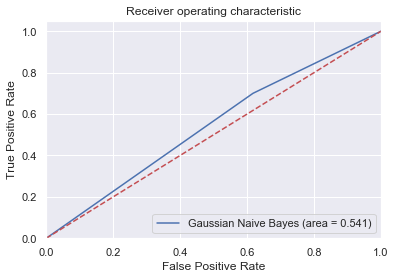

In [356]:
gnb_roc_auc = roc_auc_score(y_test, gnbmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnbmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.3f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('gnb_ROC')
plt.show()

In [357]:
gnbmodel.fit(X_train, y_train)

accuracy_gnb = accuracy_score(y_test, gnbmodel.predict(X_test))
precision_gnb = precision_score(y_test, gnbmodel.predict(X_test))
recall_gnb = recall_score(y_test, gnbmodel.predict(X_test))
f1_score_gnb = f1_score(y_test, gnbmodel.predict(X_test))
class_report_gnb = classification_report(y_test, gnbmodel.predict(X_test))

tn, fp, fn, tp = confusion_matrix(y_test, gnbmodel.predict(X_test)).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

specificity_gnb = tn/(tn+fp)
print("Specificity {:0.2f}".format(specificity_gnb))

print('Accuracy {:0.2f}:'.format(accuracy_gnb))
print('Precision {:0.2f}:'.format(precision_gnb))
print('Recall {:0.2f}:'.format(recall_gnb))
print('F1 Score {:0.2f}:'.format(f1_score_gnb))
print(class_report_gnb)

True Negatives:  26
False Positives:  42
False Negatives:  266
True Positives:  621
Specificity 0.38
Accuracy 0.68:
Precision 0.94:
Recall 0.70:
F1 Score 0.80:
              precision    recall  f1-score   support

           0       0.09      0.38      0.14        68
           1       0.94      0.70      0.80       887

    accuracy                           0.68       955
   macro avg       0.51      0.54      0.47       955
weighted avg       0.88      0.68      0.75       955



In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20, 
                                                    random_state=101, shuffle=True, stratify=y)

In [331]:
from sklearn.linear_model import LogisticRegression

In [333]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)

predictions1 = lrmodel.predict(X_test)

C:\Users\thoma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


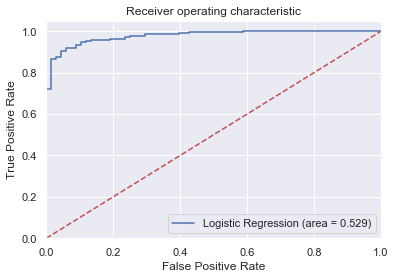

In [334]:
lr_roc_auc = roc_auc_score(y_test, lrmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lrmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('lr_ROC')
plt.show()

In [335]:
lrmodel.fit(X_train, y_train)

accuracy_lr = accuracy_score(y_test, lrmodel.predict(X_test))
precision_lr = precision_score(y_test, lrmodel.predict(X_test))
recall_lr = recall_score(y_test, lrmodel.predict(X_test))
f1_score_lr = f1_score(y_test, lrmodel.predict(X_test))
class_report_lr = classification_report(y_test, lrmodel.predict(X_test))

tn, fp, fn, tp = confusion_matrix(y_test, lrmodel.predict(X_test)).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

specificity_lr = tn/(tn+fp)
print("Specificity {:0.2f}".format(specificity_lr))

print('Accuracy {:0.2f}:'.format(accuracy_lr))
print('Precision {:0.2f}:'.format(precision_lr))
print('Recall {:0.2f}:'.format(recall_lr))
print('F1 Score {:0.2f}:'.format(f1_score_lr))
print(class_report_lr)

True Negatives:  4
False Positives:  64
False Negatives:  1
True Positives:  886
Specificity 0.06
Accuracy 0.93:
Precision 0.93:
Recall 1.00:
F1 Score 0.96:
              precision    recall  f1-score   support

           0       0.80      0.06      0.11        68
           1       0.93      1.00      0.96       887

    accuracy                           0.93       955
   macro avg       0.87      0.53      0.54       955
weighted avg       0.92      0.93      0.90       955



C:\Users\thoma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True,random_state=101,stratify=y)

In [337]:
rfcmodel = RandomForestClassifier(n_estimators=100)
rfcmodel.fit(X_train, y_train)

predictions3 = rfcmodel.predict(X_test)

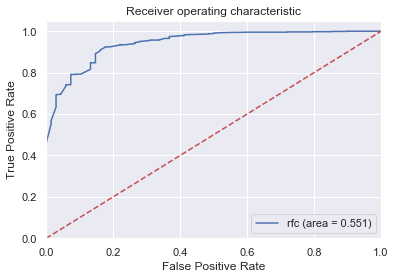

In [338]:
rfc_roc_auc = roc_auc_score(y_test, rfcmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfcmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='rfc (area = %0.3f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rfc_ROC')
plt.show()

In [339]:
print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))

[[  7  61]
 [  1 886]]
              precision    recall  f1-score   support

           0       0.88      0.10      0.18        68
           1       0.94      1.00      0.97       887

    accuracy                           0.94       955
   macro avg       0.91      0.55      0.58       955
weighted avg       0.93      0.94      0.91       955



In [347]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True,random_state=101)

In [341]:
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [342]:
# Use the model to calculate probabilities

xgb_pred = xgbmodel.predict(X_test)

# Convert probabilities to class

predictions4 = [round(value) for value in xgb_pred]

In [343]:
print(confusion_matrix(y_test,predictions4))
print(classification_report(y_test,predictions4))

[[ 13  54]
 [  2 886]]
              precision    recall  f1-score   support

           0       0.87      0.19      0.32        67
           1       0.94      1.00      0.97       888

    accuracy                           0.94       955
   macro avg       0.90      0.60      0.64       955
weighted avg       0.94      0.94      0.92       955



In [344]:
eval_set = [(X_test, y_test)]
xgbmodel.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.062827
[1]	validation_0-error:0.062827
[2]	validation_0-error:0.065969
[3]	validation_0-error:0.065969
[4]	validation_0-error:0.065969
[5]	validation_0-error:0.063874
[6]	validation_0-error:0.064921
[7]	validation_0-error:0.063874
[8]	validation_0-error:0.062827
[9]	validation_0-error:0.065969
[10]	validation_0-error:0.062827
[11]	validation_0-error:0.065969
[12]	validation_0-error:0.065969
[13]	validation_0-error:0.065969
[14]	validation_0-error:0.065969
[15]	validation_0-error:0.065969
[16]	validation_0-error:0.064921
[17]	validation_0-error:0.065969
[18]	validation_0-error:0.065969
[19]	validation_0-error:0.067016
[20]	validation_0-error:0.068063
[21]	validation_0-error:0.068063
[22]	validation_0-error:0.067016
[23]	validation_0-error:0.064921
[24]	validation_0-error:0.065969
[25]	validation_0-error:0.065969
[26]	validation_0-error:0.067016
[27]	validation_0-error:0.064921
[28]	validation_0-error:0.064921
[29]	validation_0-error:0.065969
[30]	validation_0-er

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [345]:
print(xgbmodel.feature_importances_)

[0. 0. 0. ... 0. 0. 0.]


In [348]:
n_estimators = range(50,250,25)
max_depth = range(2,10)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgbmodel, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(X_test, y_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 43.6min finished


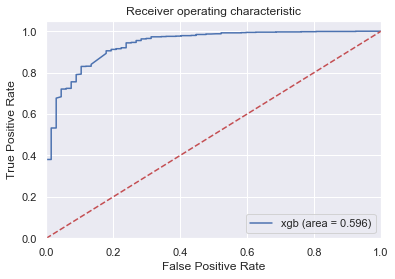

In [349]:
xgb_roc_auc = roc_auc_score(y_test, xgbmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgbmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='xgb (area = %0.3f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('xgb_ROC')
plt.show()


In [350]:
result.best_params_

{'max_depth': 2, 'n_estimators': 175}

In [351]:
xgbmodel2 = XGBClassifier(n_estimators=175,max_depth=2)
xgbmodel2.fit(X_train, y_train)

xgb_pred2 = xgbmodel2.predict(X_test)
predictions4a = [round(value) for value in xgb_pred2]

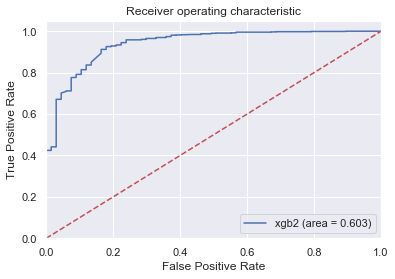

In [352]:
xgb_roc_auc2 = roc_auc_score(y_test, xgbmodel2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgbmodel2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='xgb2 (area = %0.3f)' % xgb_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('xgb2_ROC')
plt.show()

In [353]:
print(confusion_matrix(y_test,predictions4a))
print(classification_report(y_test,predictions4a))

[[ 14  53]
 [  2 886]]
              precision    recall  f1-score   support

           0       0.88      0.21      0.34        67
           1       0.94      1.00      0.97       888

    accuracy                           0.94       955
   macro avg       0.91      0.60      0.65       955
weighted avg       0.94      0.94      0.93       955

